<a href="https://colab.research.google.com/github/ZiadSakr5/ZezoSakr/blob/develop/Copy_of_shopping_data_visualization_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

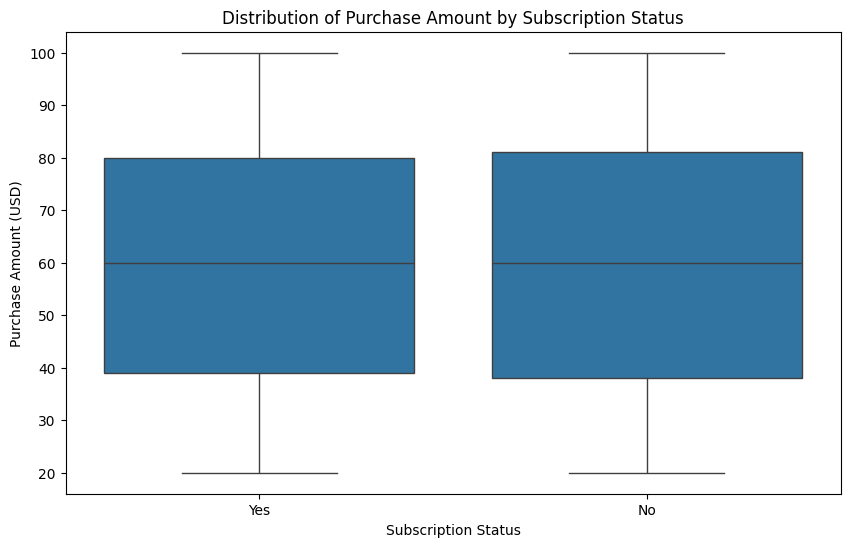

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Distribution of Purchase Amount by Subscription Status')
plt.show()



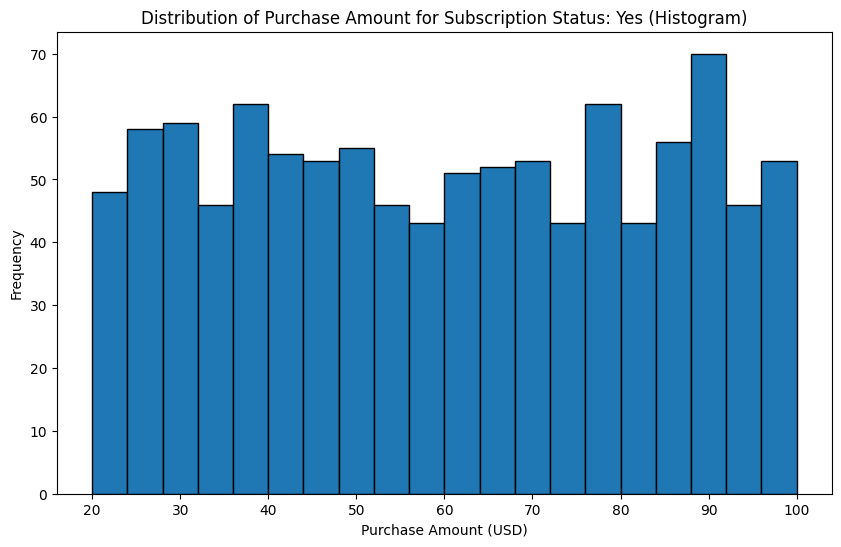

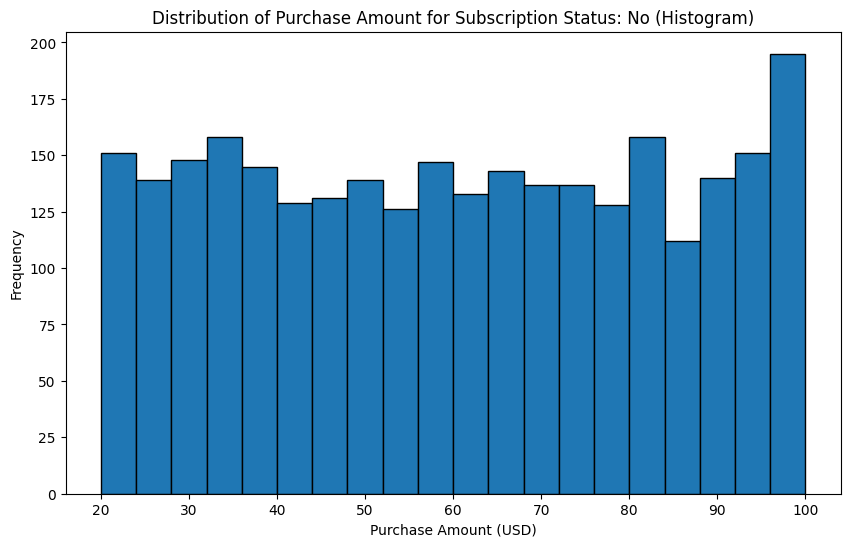

In [ ]:
subscription_statuses = df['Subscription Status'].unique()
for status in subscription_statuses:
    plt.figure(figsize=(10, 6))
    plt.hist(df[df['Subscription Status'] == status]['Purchase Amount (USD)'], bins=20, edgecolor='black')
    plt.title(f'Distribution of Purchase Amount for Subscription Status: {status} (Histogram)')
    plt.xlabel('Purchase Amount (USD)')
    plt.ylabel('Frequency')
    plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

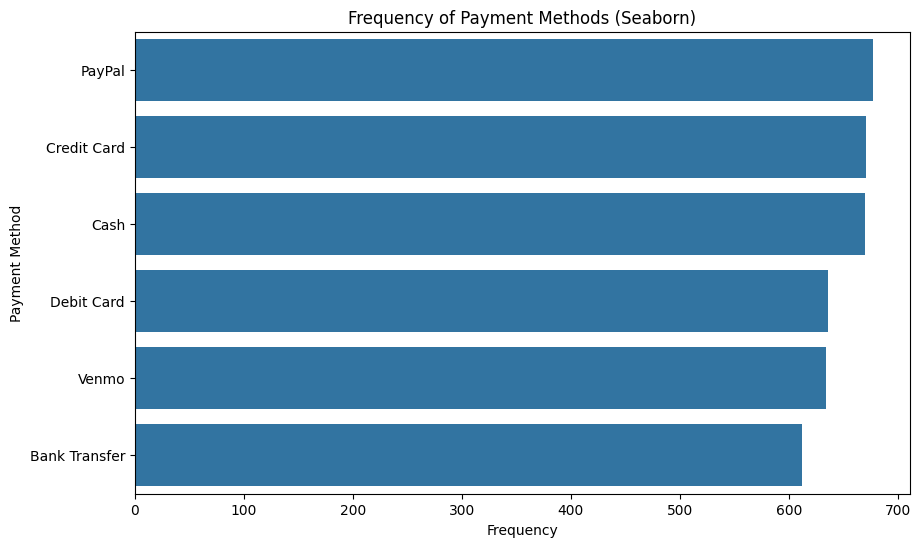

In [ ]:
payment_method_counts = df['Payment Method'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(y='Payment Method', data=df, order=payment_method_counts.index)
plt.title('Frequency of Payment Methods (Seaborn)')
plt.xlabel('Frequency')
plt.ylabel('Payment Method')
plt.show()

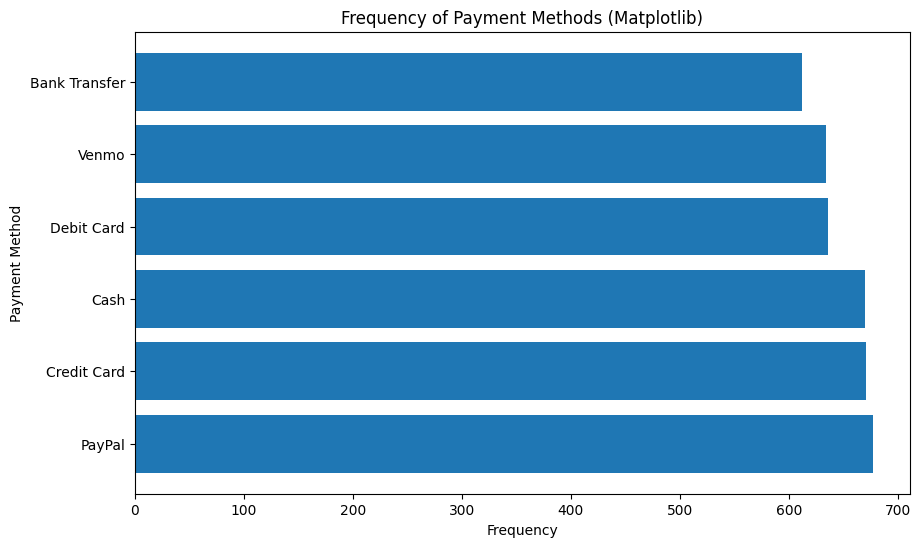

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(payment_method_counts.index, payment_method_counts.values)
plt.title('Frequency of Payment Methods (Matplotlib)')
plt.xlabel('Frequency')
plt.ylabel('Payment Method')
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

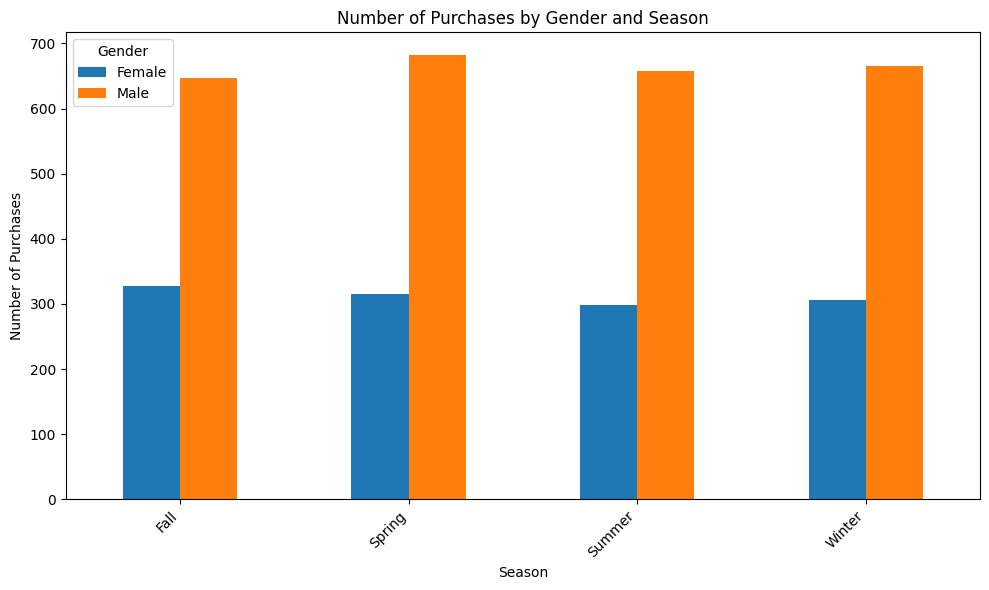

In [ ]:
season_gender_counts = df.groupby(['Season', 'Gender']).size().unstack(fill_value=0)

season_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Purchases by Gender and Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

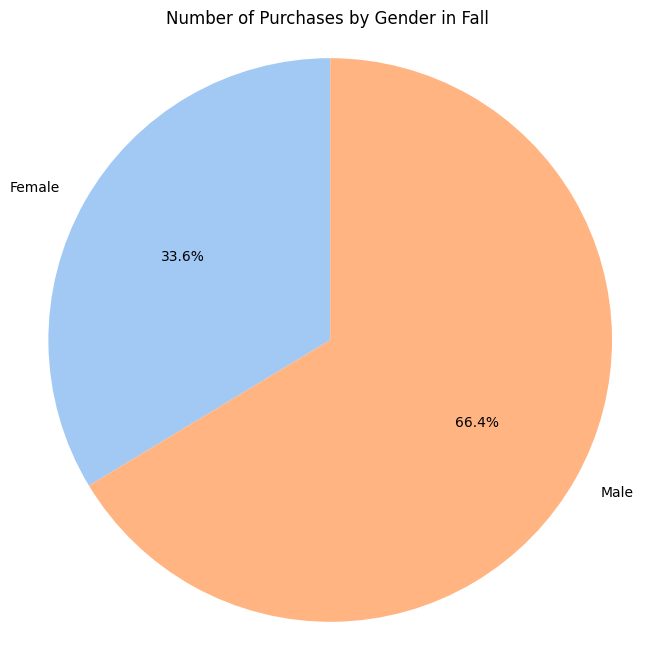

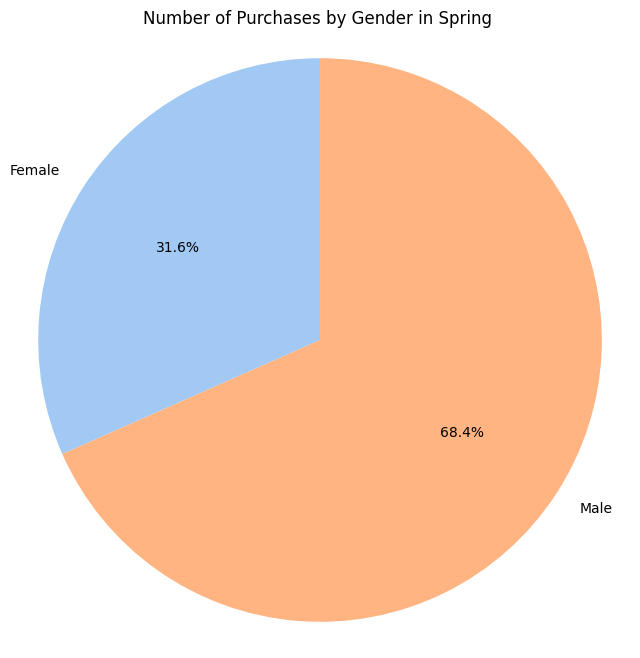

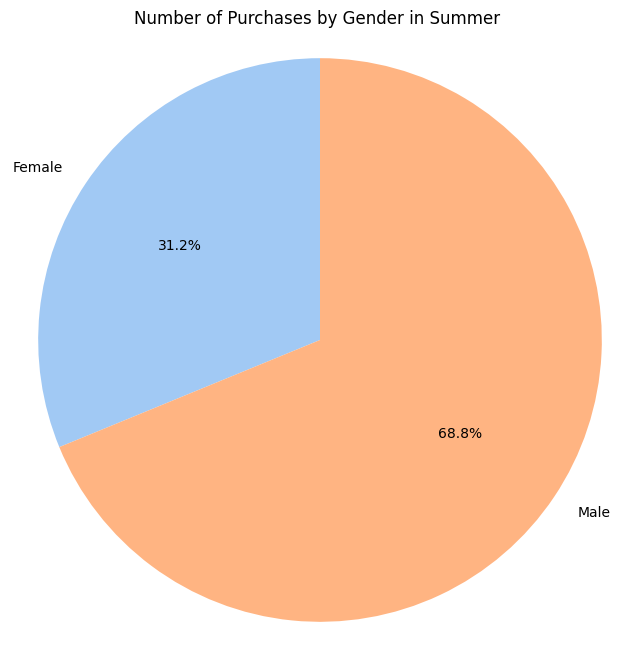

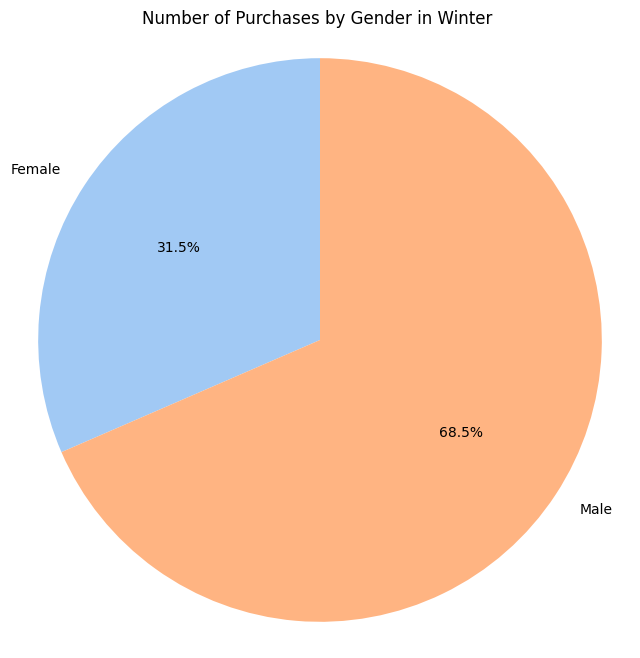

In [ ]:
for season in season_gender_counts.index:
    plt.figure(figsize=(8, 8))
    plt.pie(season_gender_counts.loc[season], labels=season_gender_counts.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Number of Purchases by Gender in {season} ')
    plt.axis('equal')
    plt.show()

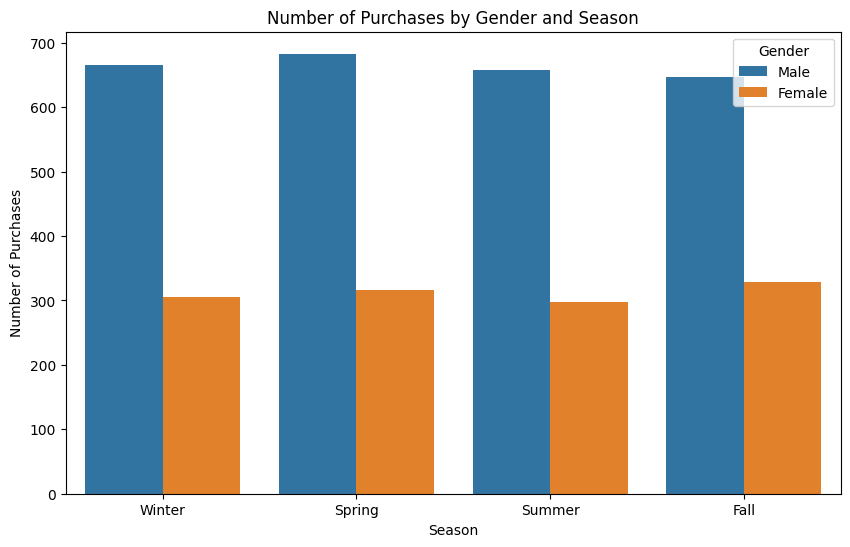

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Gender', data=df)
plt.title('Number of Purchases by Gender and Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

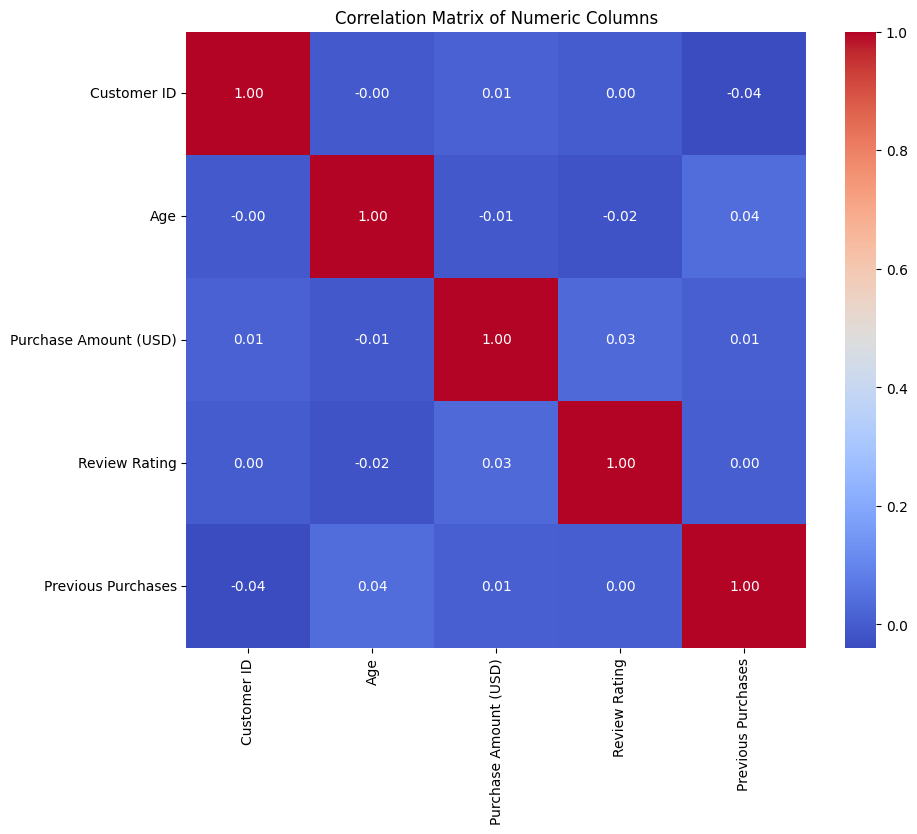

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

 the relationships between 'Previous Purchases', 'Purchase Amount', and 'Review Rating' are all very weak, there's almost no linear connection between these features.

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

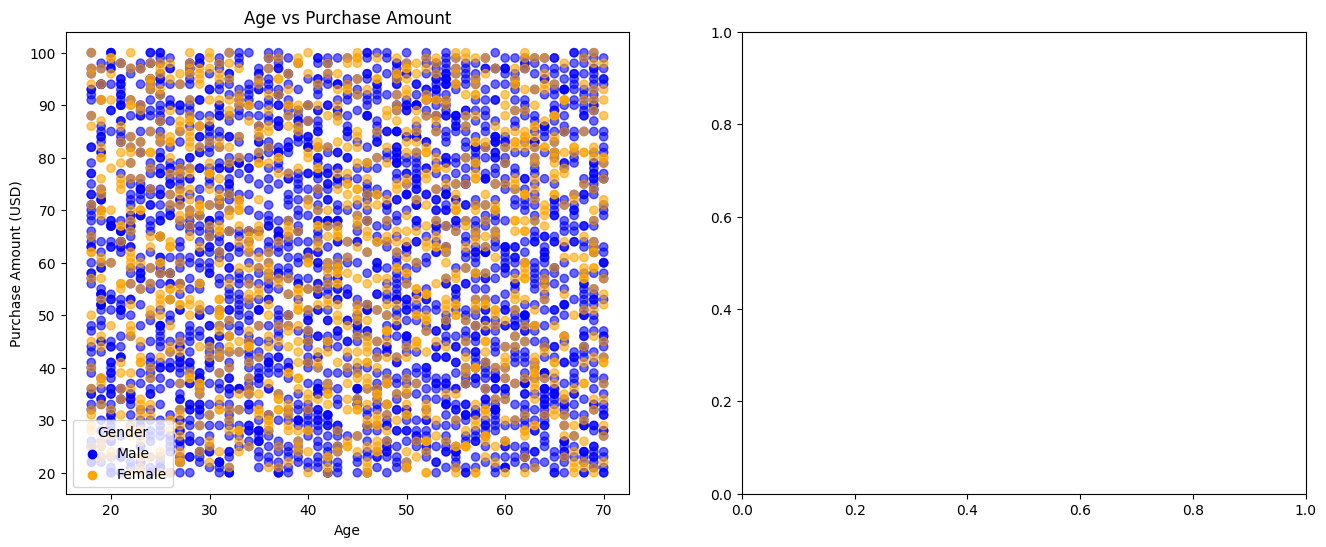

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

gender_colors = {'Male': 'blue', 'Female': 'orange'}
axes[0].scatter(df['Age'], df['Purchase Amount (USD)'], c=df['Gender'].map(gender_colors), alpha=0.6)
axes[0].set_title('Age vs Purchase Amount')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Purchase Amount (USD)')
# Add legend manually for matplotlib
for gender, color in gender_colors.items():
    axes[0].scatter([], [], c=color, label=gender)
axes[0].legend(title='Gender')

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

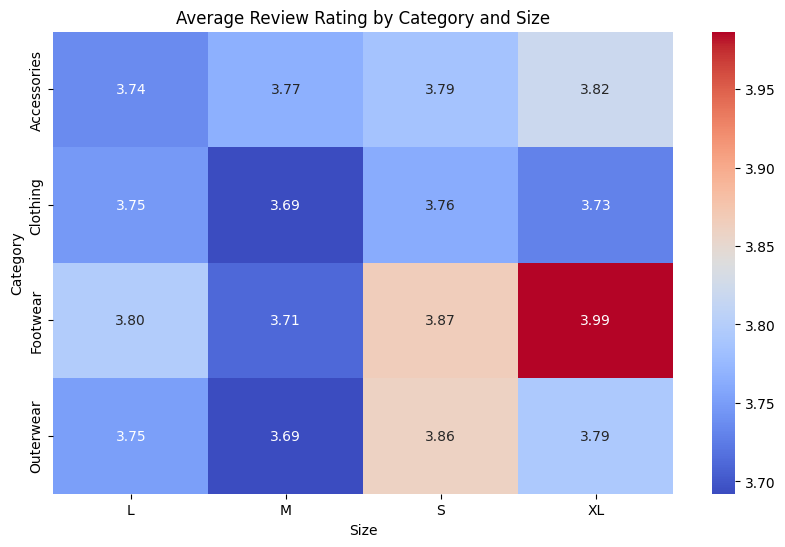

In [ ]:
pivot_table = df.pivot_table(values='Review Rating', index='Category', columns='Size', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Review Rating by Category and Size')
plt.show()

** Ratings are tightly clustered around ~3.7–3.9 . Footwear XL is the highest (3.99), while Clothing M and Outerwear M sit near the low end (3.69)**

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

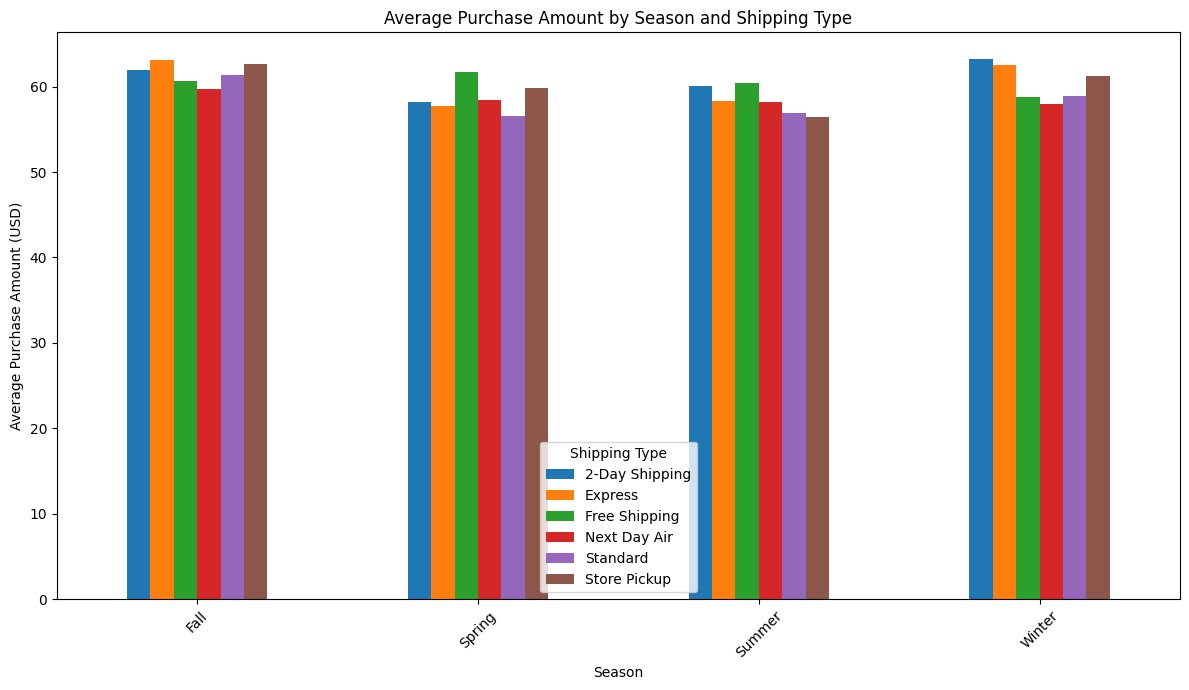

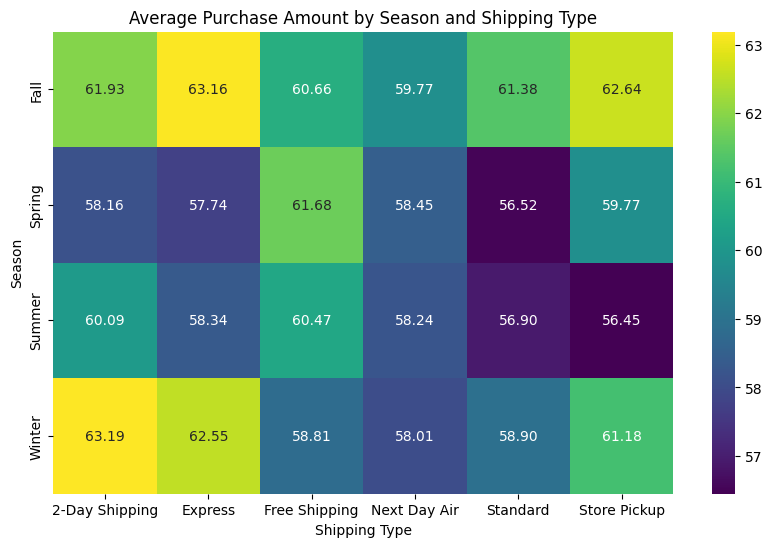

In [ ]:
pivot_table_purchase = df.pivot_table(values='Purchase Amount (USD)', index='Season', columns='Shipping Type', aggfunc='mean')
pivot_table_purchase.plot(kind='bar', figsize=(12, 7))
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Shipping Type')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_purchase, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.show()

**Average purchase amounts vary but stay in a narrow band (~56–63 USD).  Winter 2-Day Shipping (63.19) and Fall Express (63.16) are among the top.**

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

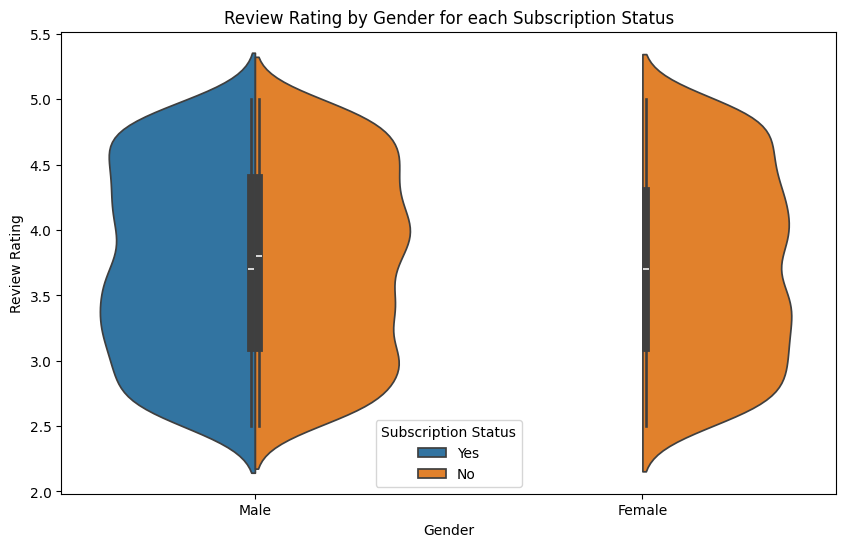

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Review Rating', hue='Subscription Status', data=df, split=True)
plt.title('Review Rating by Gender for each Subscription Status')
plt.show()

**Both genders show broad, similar distributions (range ≈2.5–5), with medians around ~3.5–4.0 — no big differences.**

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

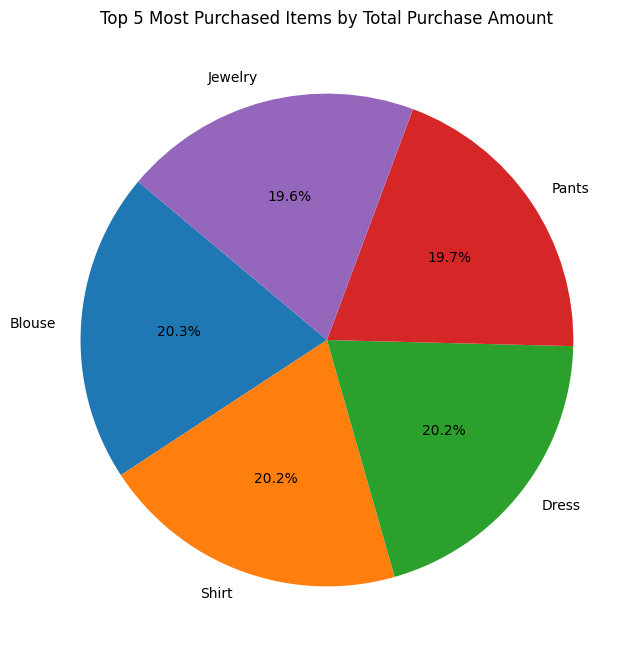

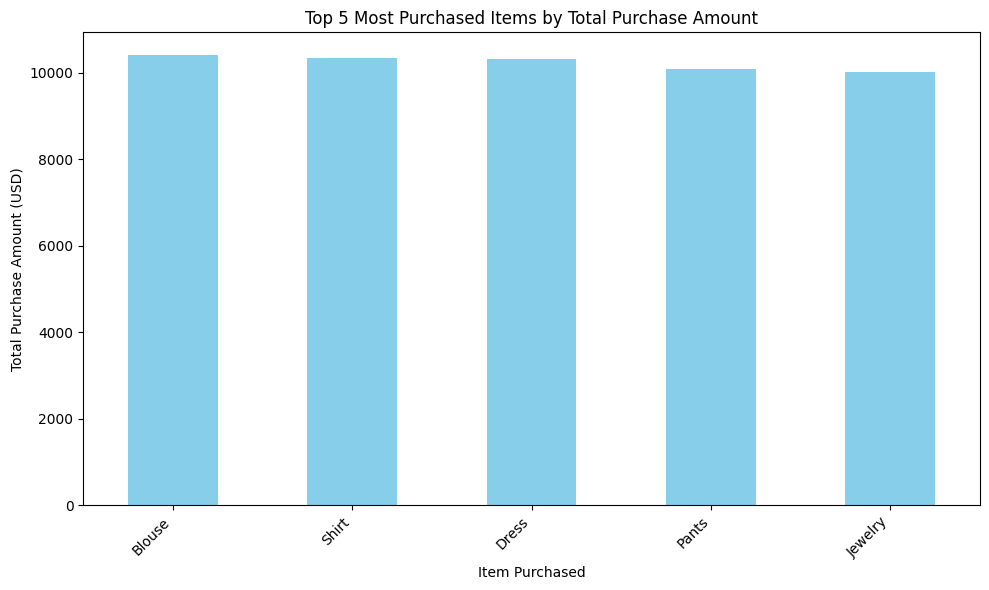

In [ ]:
top_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5)
plt.figure(figsize=(10, 8))
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.ylabel('') # Hide the y-label
plt.show()
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**each category accounting for approximately 20% of the total purchase amount. Blouses represent the largest share at 20.3%, while Pants are a very close second at 19.7%**

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

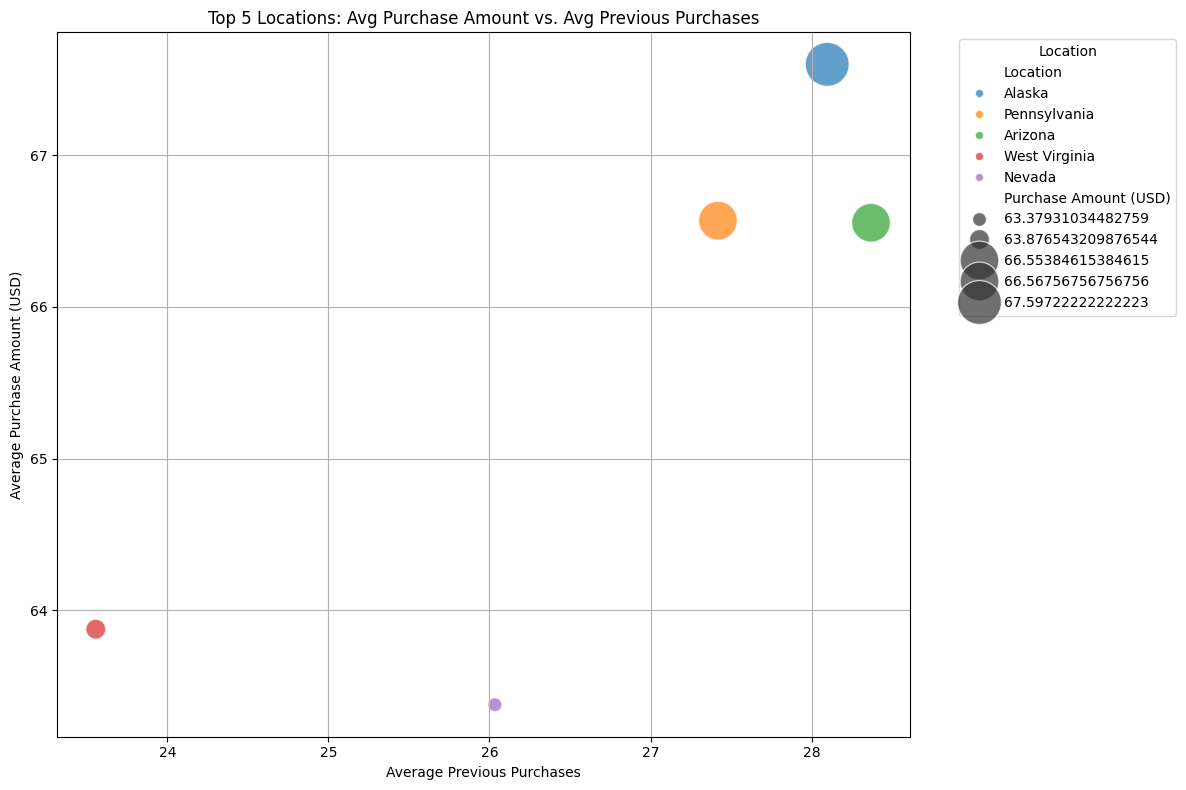

In [ ]:

location_stats = df.groupby('Location').agg({
    'Purchase Amount (USD)': 'mean',
    'Previous Purchases': 'mean'
}).reset_index()

top_5_locations = location_stats.nlargest(5, 'Purchase Amount (USD)')
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=top_5_locations,
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    size='Purchase Amount (USD)',
    hue='Location',
    sizes=(100, 1000),
    alpha=0.7
)

plt.title('Top 5 Locations: Avg Purchase Amount vs. Avg Previous Purchases')
plt.xlabel('Average Previous Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**among the top 5 locations, Alaska has the highest average purchase amount, which also correlates with the highest number of average previous purchases. Conversely, West Virginia shows the lowest average purchase amount and one of the lowest average previous purchases in this group**

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

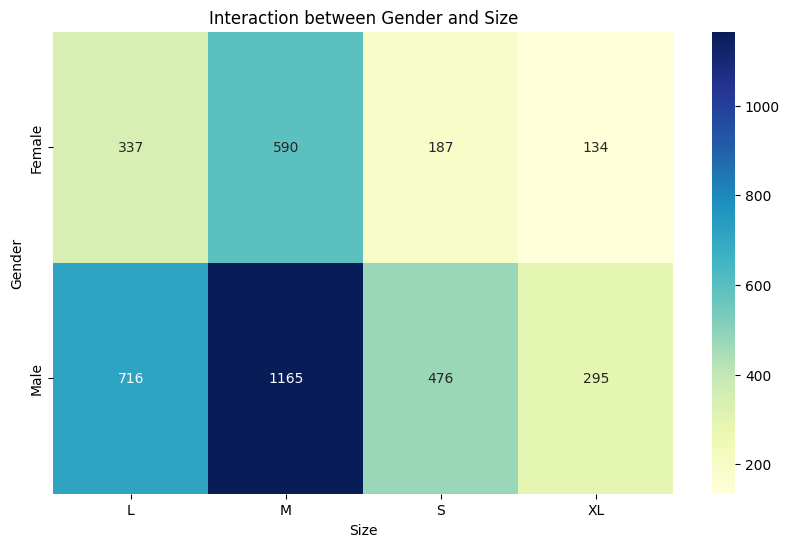

In [ ]:
import pandas as pd
gender_size_crosstab = pd.crosstab(df['Gender'], df['Size'])
plt.figure(figsize=(10, 6))
sns.heatmap(
    gender_size_crosstab,
    annot=True,
    fmt='d',
    cmap='YlGnBu'
)
plt.title('Interaction between Gender and Size')
plt.show()

**size 'M' (Medium) is the most frequently purchased size for both males and females. Furthermore, males are the primary purchasers across all listed sizes**

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

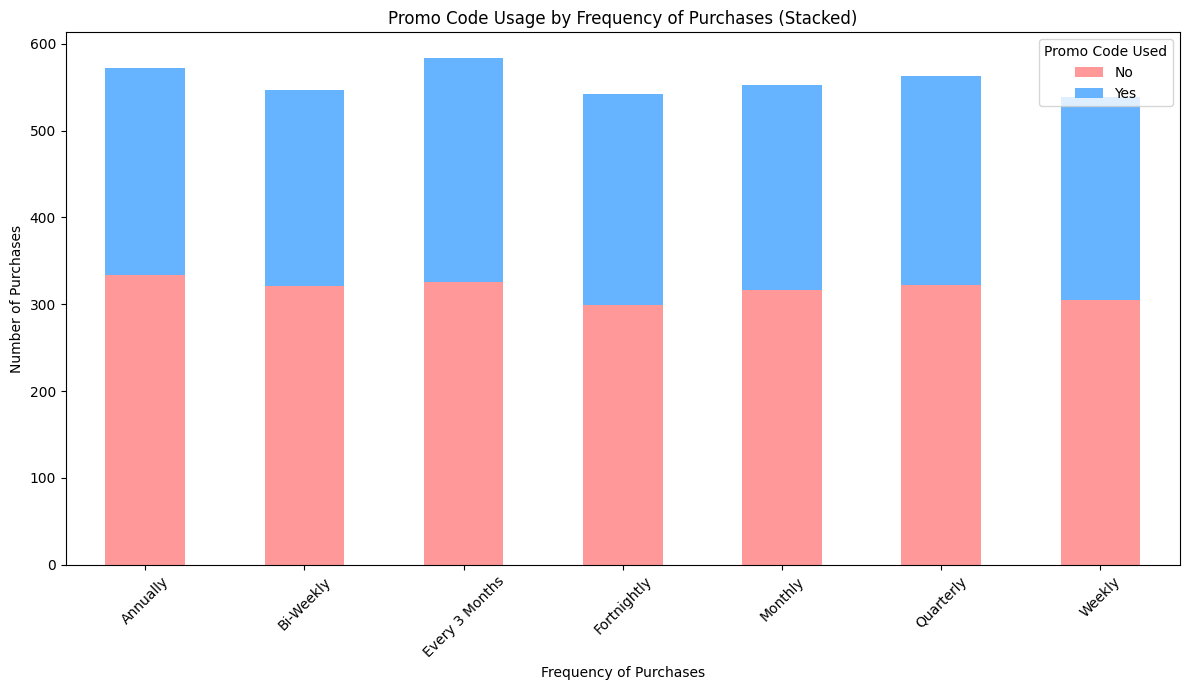

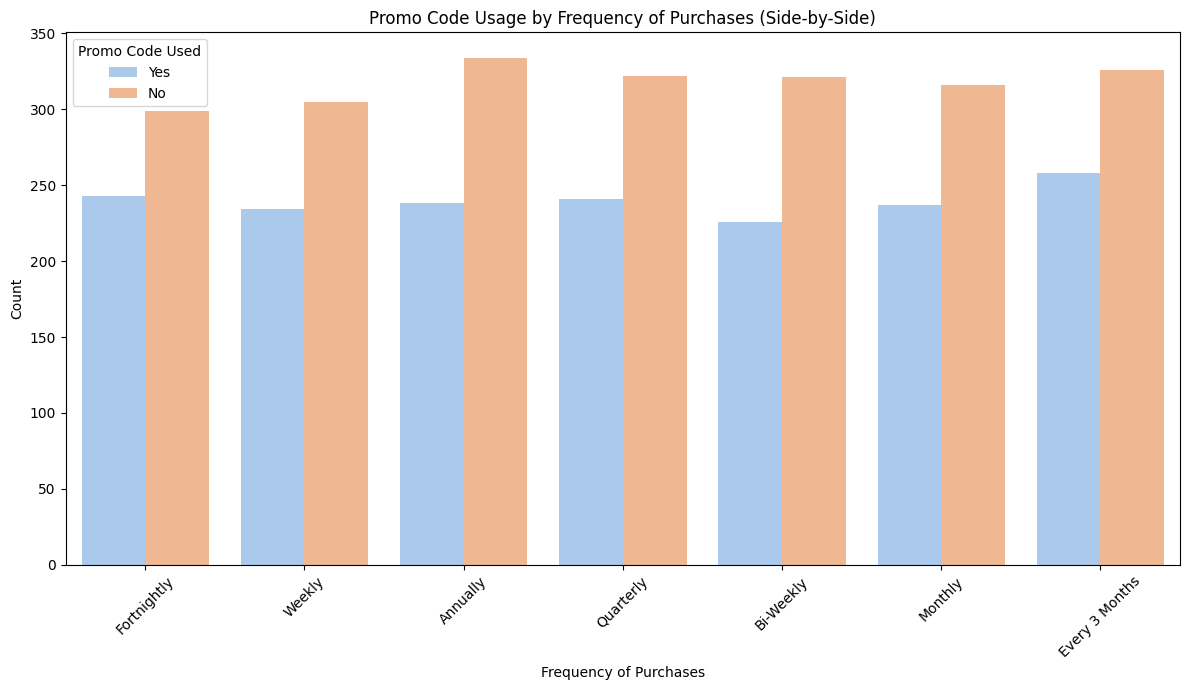

In [ ]:
promo_freq_crosstab = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])

promo_freq_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7),
                         color=['#ff9999','#66b3ff'])
plt.title('Promo Code Usage by Frequency of Purchases (Stacked)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Promo Code Used')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Frequency of Purchases', hue='Promo Code Used', palette='pastel')
plt.title('Promo Code Usage by Frequency of Purchases (Side-by-Side)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**the use of promo codes is consistently lower than non-promo code purchases.  customers who purchase on an 'Annually' and 'Every 3 Months' basis are the least likely to use a promo code**

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

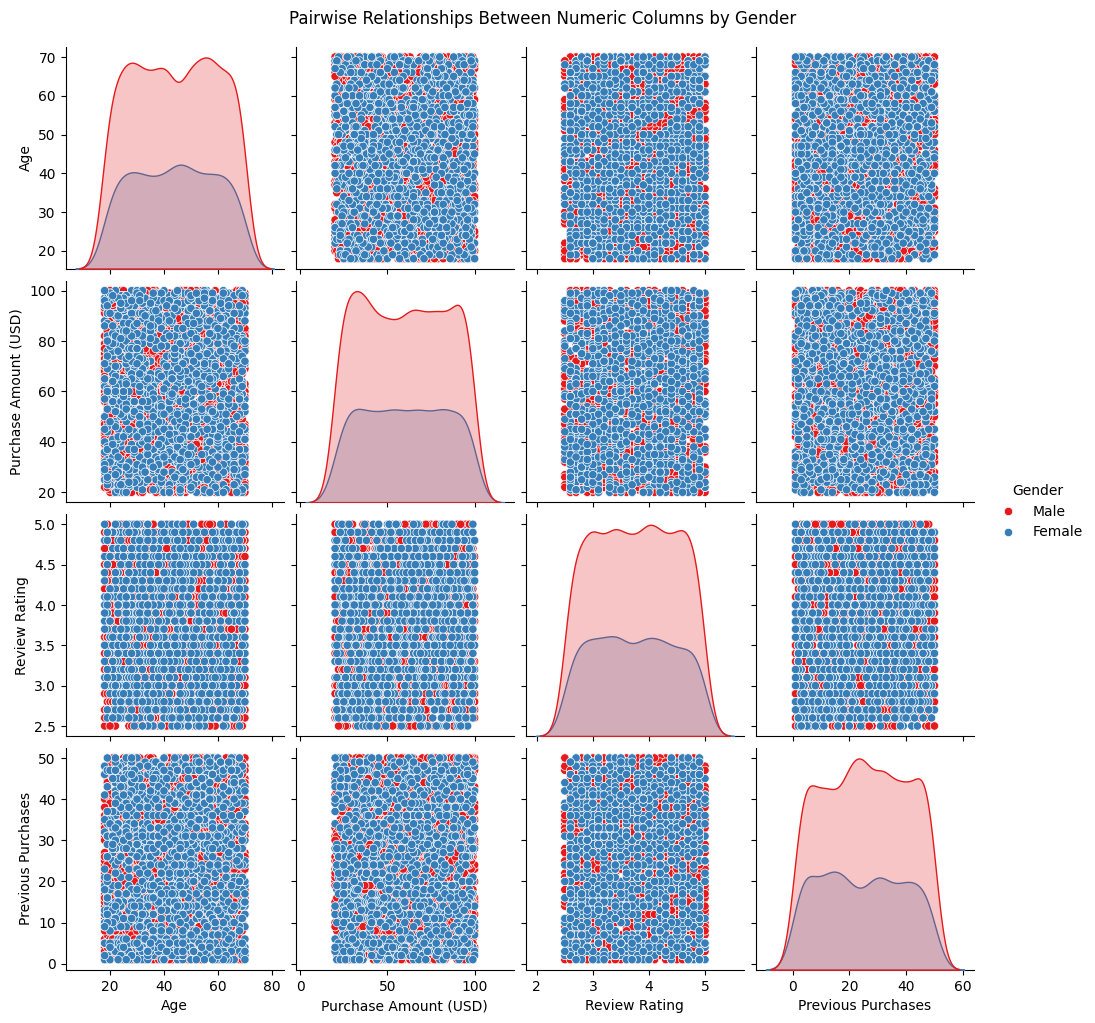

In [ ]:
numeric_cols_for_pairplot = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Gender']]
sns.pairplot(numeric_cols_for_pairplot, hue='Gender', palette='Set1')
plt.suptitle('Pairwise Relationships Between Numeric Columns by Gender', y=1.02) # Adjust title position
plt.show()

**there are no strong linear relationships between the numeric variables (Age, Purchase Amount, Review Rating, and Previous Purchases) for either gender.**